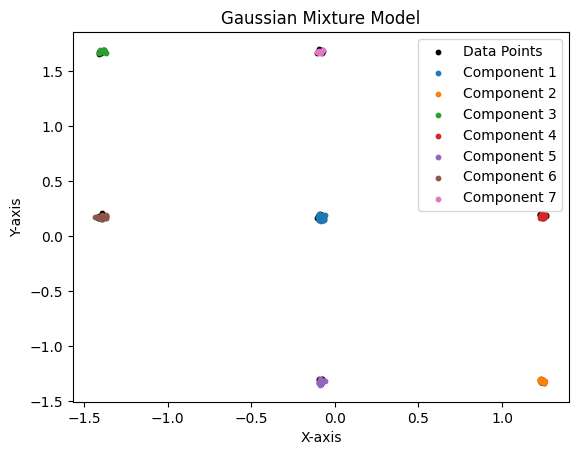

In [2]:
#---------------------4.3--Likely color components which generate the dataset--------------
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.mixture import GaussianMixture

with open('SMAI-Dataset-problem-4.3/colors.pkl', 'rb') as f:
    data = pickle.load(f)

X = np.array(data)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std
n_components = 7
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(X)
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_
plt.scatter(X[:, 0], X[:, 1], s=10, color='black', label='Data Points')

for i in range(n_components):
    mean = means[i]
    cov = covariances[i]
    weight = weights[i]
    x, y = np.random.multivariate_normal(mean, cov, int(weight * len(X))).T
    plt.scatter(x, y, s=10, label=f'Component {i + 1}')

plt.title('Gaussian Mixture Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


[[ 1.28896146e-04 -2.33745488e-06]
 [-2.33745488e-06  2.36785851e-04]]
[[ 4.21510313e-05 -2.58954366e-05]
 [-2.58954366e-05  9.00955665e-05]]
[[1.75996502e-04 6.06428533e-05]
 [6.06428533e-05 9.17009445e-05]]
[[ 1.10962800e-04 -4.28508162e-06]
 [-4.28508162e-06  8.01296421e-05]]
[[7.87518436e-05 3.95600946e-06]
 [3.95600946e-06 1.45756662e-04]]
[[1.79785850e-04 3.66482536e-05]
 [3.66482536e-05 1.24753007e-04]]
[[1.17731808e-04 6.53039825e-06]
 [6.53039825e-06 1.29960762e-04]]


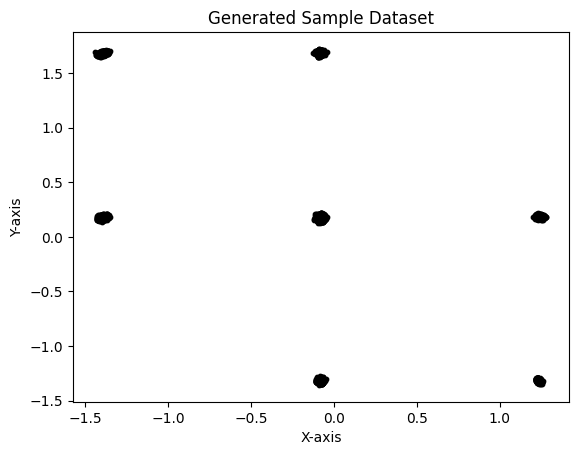

In [4]:
#---------------------4.3--Generate sample dataset--------------
import numpy as np
import matplotlib.pyplot as plt

def generate_sample_dataset(n, means, covariances, num_samples=1000):
    sample_data = []
     
    for i in range(n):
        mean = means[i]
        covariance = covariances[i]
        print(covariance)
        samples = np.random.multivariate_normal(mean, covariance, num_samples)
        sample_data.extend(samples)
    
    sample_data = np.array(sample_data)
    
    return sample_data

n=7
sample_dataset = generate_sample_dataset(n, means, covariances)

plt.scatter(sample_dataset[:, 0], sample_dataset[:, 1], s=10, color='black')
plt.title('Generated Sample Dataset')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
